# Problem defination:
  ### Detect the language spoken by the speaker (Dutch or Hindi) using audio data

# Fetching the data from the source







In [2]:
!wget https://dl.dropbox.com/s/r0n19koy8d9ebpp/dutch_hindi.tar.gz?dl=1 -O dutch_hindi_db.tar.gz

--2019-08-25 05:46:02--  https://dl.dropbox.com/s/r0n19koy8d9ebpp/dutch_hindi.tar.gz?dl=1
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://dl.dropboxusercontent.com/s/r0n19koy8d9ebpp/dutch_hindi.tar.gz?dl=1 [following]
--2019-08-25 05:46:02--  https://dl.dropboxusercontent.com/s/r0n19koy8d9ebpp/dutch_hindi.tar.gz?dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56096988 (53M) [application/octet-stream]
Saving to: ‘dutch_hindi_db.tar.gz’

dutch_hindi_db.tar. 100%[===================>]  53.50M  33.3MB/s    in 1.6s    

2019-08-25 05:46:05 (33.3 MB/s) - ‘dutch_hindi_db.tar.gz’ saved [56096988/5

In [3]:
!ls

dutch_hindi_db.tar.gz  sample_data


In [4]:
!tar xvf dutch_hindi_db.tar.gz

dutch_hindi/
dutch_hindi/u14ak3tvq5m.mp3
dutch_hindi/wloutptw5cd.mp3
dutch_hindi/ljfzikd5vka.mp3
dutch_hindi/sqqyema1xsd.mp3
dutch_hindi/4ztlvj0qyqi.mp3
dutch_hindi/ysyxtiydl35.mp3
dutch_hindi/4zg0fyam2fs.mp3
dutch_hindi/rm3ooueo2mq.mp3
dutch_hindi/cqizy04s5sa.mp3
dutch_hindi/finbnwhvfuc.mp3
dutch_hindi/bxaa10rrkzv.mp3
dutch_hindi/mjnrpuas50p.mp3
dutch_hindi/kp5yt3kbdpw.mp3
dutch_hindi/qwpzwn4ldjy.mp3
dutch_hindi/w5bastldgnw.mp3
dutch_hindi/f0gfy1vizn1.mp3
dutch_hindi/4jdw2v3b2fy.mp3


In [5]:
!ls

dutch_hindi  dutch_hindi_db.tar.gz  sample_data


In [16]:
!wget https://dl.dropbox.com/s/uyfvjusl78kt1wx/dutch_hindi_file_label.csv?dl=1 -O dutch_hindi_file_label.csv
  
!wget https://dl.dropbox.com/s/r0n19koy8d9ebpp/dutch_hindi.tar.gz?dl=1 -O dutch_hindi_db.tar.gz

--2019-08-25 06:02:02--  https://dl.dropbox.com/s/uyfvjusl78kt1wx/dutch_hindi_file_label.csv?dl=1
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://dl.dropboxusercontent.com/s/uyfvjusl78kt1wx/dutch_hindi_file_label.csv?dl=1 [following]
--2019-08-25 06:02:02--  https://dl.dropboxusercontent.com/s/uyfvjusl78kt1wx/dutch_hindi_file_label.csv?dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.65.6, 2620:100:6021:6::a27d:4106
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.65.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16569 (16K) [text/csv]
Saving to: ‘dutch_hindi_file_label.csv’

dutch_hindi_file_la 100%[===================>]  16.18K  --.-KB/s    in 0s      

2019-08-25 06:02:03 (49.7 MB/s) - ‘dutch_hindi_file_label.csv’ sa

In [17]:
!ls

dutch_hindi	       dutch_hindi_file_label.csv  trainingData.csv
dutch_hindi_db.tar.gz  sample_data


In [0]:
import pandas as pd
import IPython

In [18]:
df = pd.read_csv('dutch_hindi_file_label.csv')
df.head()

,Sample Filename,Language
0,002sjun3mz4.mp3,Dutch
1,00ywwvulzwa.mp3,Hindi
2,01rjjbm5mtn.mp3,Hindi
3,03o2w5wasmc.mp3,Dutch
4,05uipha1itb.mp3,Hindi


# Sneak peak inside the data



In [26]:
import IPython
print("Dutch")
IPython.display.Audio("dutch_hindi/002sjun3mz4.mp3")


Dutch


In [24]:
print("Hindi")
IPython.display.Audio("dutch_hindi/01rjjbm5mtn.mp3")

Hindi


# Feature engineering and EDA


> Plot Waveform

> Feature Engineering using Mel Spectrogram and MFCCs




Text(0.5, 1.0, 'Monophonic Dutch waveform')

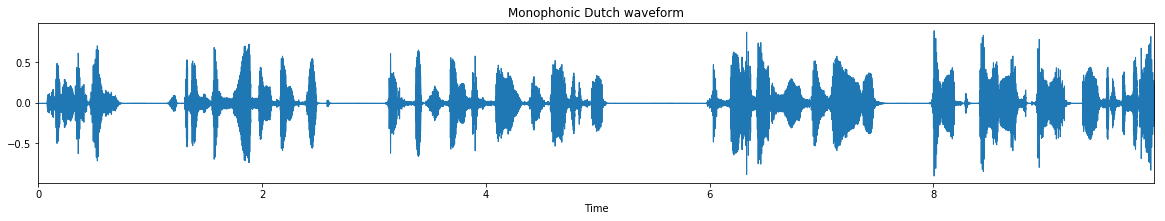

In [28]:
%matplotlib inline
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('dutch_hindi/002sjun3mz4.mp3', duration=10)

plt.figure(figsize=(20,10))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic Dutch waveform')

Text(0.5, 1.0, 'Monophonic Hindi waveform')

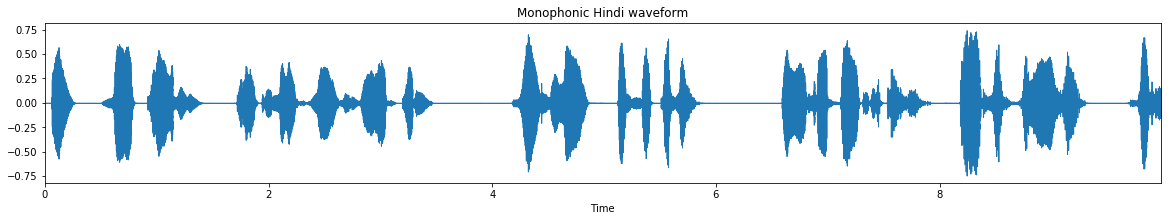

In [29]:
y, sr = librosa.load('dutch_hindi/01rjjbm5mtn.mp3', duration=10)

plt.figure(figsize=(20,10))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic Hindi waveform')

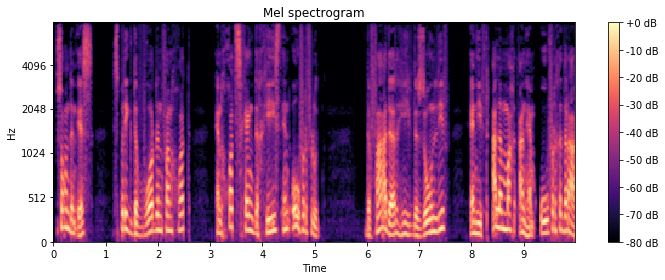

In [30]:
## Extract features

import numpy as np
y, sr = librosa.load("dutch_hindi/002sjun3mz4.mp3")

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Dutch')
plt.tight_layout()
plt.show()

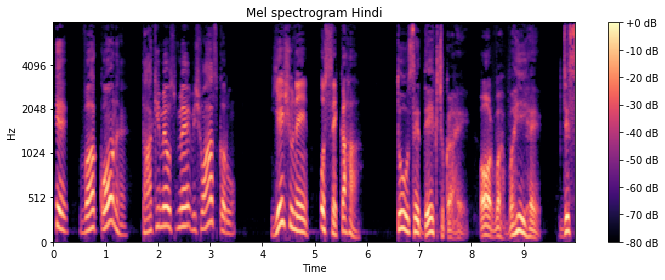

In [32]:
y, sr = librosa.load("dutch_hindi/01rjjbm5mtn.mp3")

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)


plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram Hindi')
plt.tight_layout()
plt.show()

In [0]:
## Points: -> Distribution is dense in Dutch
##          -> word length is low

In [39]:
from tqdm import tqdm

feature_df = pd.DataFrame(columns=['feature'])
class_df = pd.DataFrame(columns=['class','fname'])

i = 0

for index, row in tqdm(df.iterrows()):
  
  fname = row['Sample Filename']
  
  try:
    X, sample_rate = librosa.load('dutch_hindi/'+fname, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
    feature = mfccs
          #[float(i) for i in feature]
          #feature1=feature[:135]
    feature_df.loc[i] = [feature]
    class_df.at[i,'fname'] = fname
    class_df.at[i,'class'] = row['Language']
  except:
    i = i    
    
  i+=1
    


752it [02:43,  4.62it/s]


In [40]:
feature_df.head()

,feature
0,"[0.6516679819919248, -0.8597277485761238, -1.7..."
1,"[-32.10174431242633, -30.027403706819563, -24...."
2,"[-28.87168020942373, -23.91521297038069, -20.0..."
3,"[-23.277581327103952, -23.79797290997944, -25...."
4,"[-23.332407575245444, -17.11655411247114, -13...."


In [41]:
class_df.head()

,class,fname
0,Dutch,002sjun3mz4.mp3
1,Hindi,00ywwvulzwa.mp3
2,Hindi,01rjjbm5mtn.mp3
3,Dutch,03o2w5wasmc.mp3
4,Hindi,05uipha1itb.mp3


In [42]:
df3 = pd.DataFrame(feature_df['feature'].values.tolist())
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
0,0.651668,-0.859728,-1.716344,-2.557530,-4.881819,-4.782821,-4.725977,-6.346154,-10.949061,-16.708846,-17.883427,-19.179813,-20.296507,-21.296746,-23.682197,-24.804684,-25.367471,-25.515319,-26.358787,-27.074310,-30.557781,-30.857058,-30.444428,-35.636497,-37.914456,-35.757011,-34.119556,-33.397801,-32.916026,-33.141505,-30.528188,-30.559352,-32.382510,-32.729259,-31.865721,-30.946630,-31.267418,-31.236552,-34.183176,-37.029903,...,-36.303377,-34.895647,-28.792262,-21.737997,-18.012879,-20.091481,-27.296100,-32.951832,-34.480561,-33.924816,-35.876889,-36.515213,-35.622361,-35.746238,-35.683719,-35.020715,-35.456857,-36.766324,-35.605385,-32.934293,-33.688031,-37.286825,-37.028611,-35.881594,-33.623566,-33.431422,-33.057062,-33.285974,-33.053533,-34.886920,-33.699689,-32.962170,-32.953460,-35.282044,-35.835375,-36.232771,-38.087880,-36.800550,-35.604921,-35.500730
1,-32.101744,-30.027404,-24.556998,-21.765059,-15.063681,-9.826113,-7.602924,-6.981786,-7.551032,-7.414830,-6.901629,-5.838616,-5.614939,-5.803843,-7.169722,-10.165399,-14.919845,-16.138387,-16.640677,-18.580705,-21.212782,-21.067562,-21.471631,-21.696685,-21.723693,-21.538757,-21.753982,-20.479973,-13.264248,-7.904728,-6.748776,-6.518229,-7.450434,-8.491771,-9.063157,-9.905993,-10.645438,-10.959562,-10.700718,-10.739099,...,-41.444785,-40.902653,-36.744480,-16.840462,-10.067975,-7.308367,-8.098972,-8.522267,-8.543443,-8.224520,-7.084647,-7.953600,-8.315600,-8.728022,-9.881721,-11.371066,-13.987047,-16.151674,-19.969824,-30.584738,-35.196112,-39.209546,-39.704528,-38.160615,-38.691177,-40.312566,-38.200661,-36.389164,-35.740258,-34.009919,-20.689626,-12.571499,-9.339580,-8.275954,-7.610239,-8.149347,-8.820070,-8.986944,-2.638333,1.749896
2,-28.871680,-23.915213,-20.069338,-20.195549,-19.973825,-19.400019,-18.245962,-16.654998,-15.583341,-13.261512,-13.034645,-11.176253,-11.993621,-12.156209,-11.479674,-12.163407,-11.982502,-13.879835,-15.440651,-14.588133,-15.297826,-17.384163,-18.072046,-18.109715,-17.096875,-19.940683,-27.872431,-33.568609,-35.776408,-38.899454,-40.127447,-39.933013,-40.028706,-40.563482,-41.457548,-33.944371,-22.772692,-16.478125,-14.515171,-15.236758,...,-25.113662,-24.808916,-25.204103,-27.544965,-28.535660,-27.116027,-26.155864,-27.026476,-26.644611,-24.096009,-21.388390,-19.415736,-18.993570,-18.913312,-18.817251,-16.151874,-15.010055,-15.128134,-19.999001,-24.049986,-24.099226,-23.827839,-21.517155,-16.118676,-14.671391,-17.366332,-20.999598,-22.409462,-23.333474,-22.471098,-21.258034,-20.601300,-22.785023,-21.139228,-22.783346,-21.255846,-20.855979,-22.897445,-23.403945,-20.532417
3,-23.277581,-23.797973,-25.894186,-24.170584,-24.102891,-23.926300,-25.405618,-27.449565,-29.342464,-28.581414,-26.781145,-23.920992,-12.640419,-7.717331,-8.394403,-5.088389,-3.759287,-0.382771,-2.080574,-3.943429,-2.753525,-1.587647,-1.498208,-2.309261,-2.782092,-2.844599,-3.084620,-5.592828,-7.584074,-11.254456,-15.088295,-19.353450,-23.835302,-25.040551,-28.640665,-29.122399,-23.766546,-17.943052,-14.731452,-12.811773,...,-32.181428,-31.676992,-32.047101,-31.905969,-32.155742,-33.011030,-32.221454,-32.415694,-31.731430,-32.060527,-30.824665,-32.243473,-31.608257,-29.971362,-28.565128,-27.116588,-29.851014,-30.257733,-28.323370,-25.874125,-25.839307,-27.929310,-28.038451,-27.560380,-27.941111,-25.923058,-26.235162,-26.140309,-26.764654,-26.696455,-23.705523,-20.699457,-21.934937,-24.399253,-23.633315,-23.781454,-23.666833,-23.829945,-22.554742,-25.824479
4,-23.332408,-17.116554,-13.892994,-14.183966,-17.065691,-17.343898,-18.569204,-17.135621,-17.324990,-15.860703,-14.094106,-11.309583,-10.154934,-10.613336,-15.571100,-23.279496,-23.837655,-21.869506,-20.597286,-20.114686,-25.087830,-30.29262

In [43]:
df3['class'] = list(class_df['class'])
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,class
0,0.651668,-0.859728,-1.716344,-2.557530,-4.881819,-4.782821,-4.725977,-6.346154,-10.949061,-16.708846,-17.883427,-19.179813,-20.296507,-21.296746,-23.682197,-24.804684,-25.367471,-25.515319,-26.358787,-27.074310,-30.557781,-30.857058,-30.444428,-35.636497,-37.914456,-35.757011,-34.119556,-33.397801,-32.916026,-33.141505,-30.528188,-30.559352,-32.382510,-32.729259,-31.865721,-30.946630,-31.267418,-31.236552,-34.183176,-37.029903,...,-34.895647,-28.792262,-21.737997,-18.012879,-20.091481,-27.296100,-32.951832,-34.480561,-33.924816,-35.876889,-36.515213,-35.622361,-35.746238,-35.683719,-35.020715,-35.456857,-36.766324,-35.605385,-32.934293,-33.688031,-37.286825,-37.028611,-35.881594,-33.623566,-33.431422,-33.057062,-33.285974,-33.053533,-34.886920,-33.699689,-32.962170,-32.953460,-35.282044,-35.835375,-36.232771,-38.087880,-36.800550,-35.604921,-35.500730,Dutch
1,-32.101744,-30.027404,-24.556998,-21.765059,-15.063681,-9.826113,-7.602924,-6.981786,-7.551032,-7.414830,-6.901629,-5.838616,-5.614939,-5.803843,-7.169722,-10.165399,-14.919845,-16.138387,-16.640677,-18.580705,-21.212782,-21.067562,-21.471631,-21.696685,-21.723693,-21.538757,-21.753982,-20.479973,-13.264248,-7.904728,-6.748776,-6.518229,-7.450434,-8.491771,-9.063157,-9.905993,-10.645438,-10.959562,-10.700718,-10.739099,...,-40.902653,-36.744480,-16.840462,-10.067975,-7.308367,-8.098972,-8.522267,-8.543443,-8.224520,-7.084647,-7.953600,-8.315600,-8.728022,-9.881721,-11.371066,-13.987047,-16.151674,-19.969824,-30.584738,-35.196112,-39.209546,-39.704528,-38.160615,-38.691177,-40.312566,-38.200661,-36.389164,-35.740258,-34.009919,-20.689626,-12.571499,-9.339580,-8.275954,-7.610239,-8.149347,-8.820070,-8.986944,-2.638333,1.749896,Hindi
2,-28.871680,-23.915213,-20.069338,-20.195549,-19.973825,-19.400019,-18.245962,-16.654998,-15.583341,-13.261512,-13.034645,-11.176253,-11.993621,-12.156209,-11.479674,-12.163407,-11.982502,-13.879835,-15.440651,-14.588133,-15.297826,-17.384163,-18.072046,-18.109715,-17.096875,-19.940683,-27.872431,-33.568609,-35.776408,-38.899454,-40.127447,-39.933013,-40.028706,-40.563482,-41.457548,-33.944371,-22.772692,-16.478125,-14.515171,-15.236758,...,-24.808916,-25.204103,-27.544965,-28.535660,-27.116027,-26.155864,-27.026476,-26.644611,-24.096009,-21.388390,-19.415736,-18.993570,-18.913312,-18.817251,-16.151874,-15.010055,-15.128134,-19.999001,-24.049986,-24.099226,-23.827839,-21.517155,-16.118676,-14.671391,-17.366332,-20.999598,-22.409462,-23.333474,-22.471098,-21.258034,-20.601300,-22.785023,-21.139228,-22.783346,-21.255846,-20.855979,-22.897445,-23.403945,-20.532417,Hindi
3,-23.277581,-23.797973,-25.894186,-24.170584,-24.102891,-23.926300,-25.405618,-27.449565,-29.342464,-28.581414,-26.781145,-23.920992,-12.640419,-7.717331,-8.394403,-5.088389,-3.759287,-0.382771,-2.080574,-3.943429,-2.753525,-1.587647,-1.498208,-2.309261,-2.782092,-2.844599,-3.084620,-5.592828,-7.584074,-11.254456,-15.088295,-19.353450,-23.835302,-25.040551,-28.640665,-29.122399,-23.766546,-17.943052,-14.731452,-12.811773,...,-31.676992,-32.047101,-31.905969,-32.155742,-33.011030,-32.221454,-32.415694,-31.731430,-32.060527,-30.824665,-32.243473,-31.608257,-29.971362,-28.565128,-27.116588,-29.851014,-30.257733,-28.323370,-25.874125,-25.839307,-27.929310,-28.038451,-27.560380,-27.941111,-25.923058,-26.235162,-26.140309,-26.764654,-26.696455,-23.705523,-20.699457,-21.934937,-24.399253,-23.633315,-23.781454,-23.666833,-23.829945,-22.554742,-25.824479,Dutch
4,-23.332408,-17.116554,-13.892994,-14.183966,-17.065691,-17.343898,-18.569204,-17.135621,-17.324990,-15.860703,-14.094106,-11.309583,-10.154934,-10.613336,-15.571100,-23.279496,-23.837655,-21.869506,-20.597286,-20.114686,-25.087830,-30.292620,-25.449678,-16.8

In [44]:
from sklearn.utils import shuffle
rnewdf = shuffle(df3)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,class
744,5.872801,3.998048,-2.965293,-2.259397,-1.782549,-5.798566,-9.896545,-14.727233,-9.999247,-6.682736,-5.531320,-7.777441,-11.493266,-13.680919,-19.154294,-20.783281,-8.016344,-4.170104,-4.815497,-4.242805,-2.319030,-2.034530,-3.905973,-5.997209,-11.967915,-12.014578,-12.355445,-12.052968,-12.693643,-15.366993,-14.938579,-16.309063,-20.010629,-24.973281,-25.849101,-26.659145,-26.793664,-28.240882,-27.351059,-22.173268,...,-7.287670,-8.488573,-7.863374,-6.867930,-7.483614,-7.677514,-7.642878,-9.211417,-10.180057,-8.433155,-7.461238,-8.865884,-7.301910,-6.869372,-8.026952,-12.211448,-11.122588,-12.321170,-13.211737,-14.476492,-19.377558,-23.350694,-26.156263,-28.367495,-27.941404,-27.183158,-28.095099,-23.050320,-21.110063,-23.314273,-28.707004,-29.227823,-29.865712,-30.805759,-31.040512,-28.690876,-28.321629,-30.833065,-33.611714,Dutch
6,-7.772541,-9.361320,-9.138354,-8.909144,-11.006365,-15.386964,-15.067068,-12.777951,-11.057619,-10.719865,-9.065374,-11.993077,-22.485881,-27.064133,-28.689070,-31.318862,-26.302547,-17.047366,-12.897287,-13.139307,-16.063733,-18.684518,-19.369160,-21.329248,-23.139052,-25.768515,-17.967818,-15.297073,-17.850944,-20.034611,-21.424737,-21.980227,-23.912915,-20.566612,-16.222257,-12.500324,-10.282097,-6.257857,-5.050759,-5.292264,...,-19.793852,-21.602614,-25.011488,-32.268337,-35.509562,-38.593818,-39.288999,-38.841694,-34.020030,-28.157948,-18.698652,-11.889921,-8.517125,-9.631210,-9.431434,-10.293590,-9.307573,-10.889137,-12.668059,-8.830821,-9.776672,-11.862687,-13.475671,-15.426144,-17.530330,-17.526525,-14.939508,-14.821604,-15.768930,-16.175155,-16.800625,-18.418312,-17.560438,-16.783261,-17.005262,-17.453366,-16.354484,-14.048722,-12.806349,Hindi
219,-6.746042,-5.976132,-6.405704,-6.244304,-6.636949,-5.881768,-5.271175,-5.877321,-7.387815,-7.995627,-6.174043,-6.093610,-7.899764,-6.647147,-7.641343,-9.034596,-15.005511,-25.246516,-28.672317,-31.954306,-28.872100,-16.822063,-12.947622,-10.105578,-9.560943,-12.261433,-13.628576,-13.426051,-13.603901,-12.246028,-10.828360,-12.617805,-15.488266,-20.127862,-22.671997,-18.718617,-15.866513,-16.087518,-17.015636,-16.783128,...,-28.142491,-29.115455,-28.052256,-30.074651,-30.734350,-30.868237,-30.475734,-31.586309,-30.147829,-30.082733,-32.045149,-33.989794,-31.942344,-33.114086,-33.355922,-34.018059,-33.427283,-28.615039,-18.167955,-12.766655,-12.688043,-10.661129,-10.315525,-9.561307,-8.882493,-9.216051,-9.769270,-10.527195,-9.943804,-9.102955,-8.063843,-7.889200,-7.606942,-7.001282,-6.317019,-6.173279,-5.983307,-4.952241,-1.771157,Dutch
670,-14.091835,-12.205125,-10.747027,-10.684443,-12.000202,-14.707945,-18.450312,-20.003899,-23.052660,-25.290573,-25.137138,-23.138746,-22.734162,-22.615791,-23.725244,-23.632762,-22.586065,-16.206838,-11.344943,-14.702697,-20.794133,-16.467750,-15.673927,-15.541397,-18.914776,-20.162859,-20.589414,-20.952136,-17.109294,-16.329086,-16.908476,-20.972722,-25.516042,-27.033117,-25.324490,-18.250860,-14.930464,-13.135258,-11.315181,-13.054924,...,-30.169539,-31.609053,-34.192233,-37.221540,-37.730817,-39.584246,-40.189181,-40.528140,-40.563121,-40.712561,-40.760259,-40.843564,-40.856413,-40.856413,-40.856413,-40.856413,-40.692179,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.696497,-37.559869,-37.846067,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.856413,-40.805907,-40.823520,Hindi
69,-2.678965,-5.517804,-9.375250,-8.987074,-10.456882,-11.778475,-11.319519,-10.305909,-10.615880,-9.604603,-10.549426,-10.418987,-9.361195,-9.482296,-8.131822,-8.520245,-8.827802,-8.202752,-8.313730,-9.256554,-8.869449,-7.583651,-8.816643,-8.912320,-8.044381,-8.190221,-9.1

In [0]:
rnewdf=rnewdf.fillna(0)
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [0]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


In [55]:
trainfeatures[:][:1], trainlabel[:][:1]

(          0         1         2    ...        213        214        215
 744  5.872801  3.998048 -2.965293  ... -28.321629 -30.833065 -33.611714
 
 [1 rows x 216 columns],      class
 744  Dutch)

In [56]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [58]:
X_train.shape


(591, 216)

# Designing neural network architecture

In [0]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [0]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [61]:
model = Sequential()
model.add(LSTM(256, return_sequences=True,input_shape=(216, 1))) 

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

W0825 07:00:26.120217 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 07:00:26.172023 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 07:00:26.181019 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 07:00:26.614999 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0825 07:00:26.623986 

In [62]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])


W0825 07:00:43.662100 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 07:00:43.675201 140514513819520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 216, 256)          264192    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 216, 256)          327936    
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
__________

In [66]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=20, validation_data=(x_testcnn, y_test))

Train on 591 samples, validate on 161 samples
Epoch 1/20
591/591 [==============================] - 16s 27ms/step - loss: 0.6815 - acc: 0.5279 - val_loss: 0.6747 - val_acc: 0.5031
Epoch 2/20
591/591 [==============================] - 15s 26ms/step - loss: 0.6608 - acc: 0.5888 - val_loss: 0.6519 - val_acc: 0.5528
Epoch 3/20
591/591 [==============================] - 16s 26ms/step - loss: 0.6265 - acc: 0.6548 - val_loss: 0.6164 - val_acc: 0.7888
Epoch 4/20
591/591 [==============================] - 16s 26ms/step - loss: 0.5810 - acc: 0.7750 - val_loss: 0.5656 - val_acc: 0.7453
Epoch 5/20
591/591 [==============================] - 16s 26ms/step - loss: 0.5286 - acc: 0.7919 - val_loss: 0.5110 - val_acc: 0.7950
Epoch 6/20
591/591 [==============================] - 16s 26ms/step - loss: 0.4791 - acc: 0.8054 - val_loss: 0.4658 - val_acc: 0.8261
Epoch 7/20
591/591 [==============================] - 15s 26ms/step - loss: 0.4405 - acc: 0.8342 - val_loss: 0.4146 - val_acc: 0.8634
Epoch 8/20
591/5

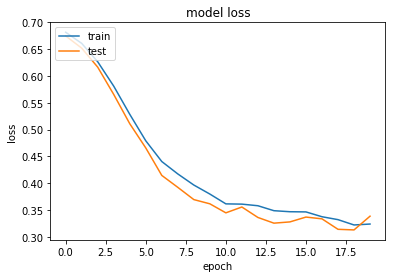

In [67]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save('dutch_hindi_model_v1.h5')


In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [70]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("dutch_hindi_model_v1.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 86.96%


In [71]:
preds = loaded_model.predict(x_testcnn, batch_size=32, verbose=1)

161/161 [==============================] - 1s 7ms/step


In [72]:
preds

array([[0.04761773, 0.95238227],
       [0.67893386, 0.32106617],
       [0.730192  , 0.26980796],
       [0.05101478, 0.9489852 ],
       [0.07887677, 0.9211232 ],
       [0.07365421, 0.9263458 ],
       [0.3926992 , 0.60730076],
       [0.04812773, 0.9518723 ],
       [0.95588243, 0.04411758],
       [0.05327955, 0.9467205 ],
       [0.9839894 , 0.01601065],
       [0.05915773, 0.9408423 ],
       [0.2975185 , 0.70248145],
       [0.91961575, 0.08038423],
       [0.04819914, 0.9518008 ],
       [0.08923052, 0.9107695 ],
       [0.04863951, 0.9513605 ],
       [0.9877043 , 0.01229574],
       [0.12889344, 0.87110656],
       [0.6823965 , 0.31760353],
       [0.9569505 , 0.0430495 ],
       [0.9812599 , 0.01874018],
       [0.04768301, 0.952317  ],
       [0.14208573, 0.8579143 ],
       [0.05141538, 0.9485846 ],
       [0.05898113, 0.9410188 ],
       [0.10127696, 0.898723  ],
       [0.6160739 , 0.38392606],
       [0.32929862, 0.6707013 ],
       [0.04100084, 0.95899916],
       [0.

In [74]:
preds1=preds.argmax(axis=1)
preds1

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1])

In [75]:
abc = preds1.astype(int).flatten()
predictions = (lb.inverse_transform((abc)))
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,Hindi
1,Dutch
2,Dutch
3,Hindi
4,Hindi
5,Hindi
6,Hindi
7,Hindi
8,Dutch
9,Hindi


In [0]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))


In [79]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,Hindi
1,Dutch
2,Dutch
3,Hindi
4,Hindi
5,Hindi
6,Hindi
7,Hindi
8,Dutch
9,Hindi


In [85]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,Hindi,Hindi
1,Dutch,Dutch
2,Dutch,Dutch
3,Hindi,Hindi
4,Hindi,Hindi
5,Hindi,Hindi
6,Hindi,Hindi
7,Hindi,Hindi
8,Dutch,Dutch
9,Hindi,Hindi


In [0]:
s